<h2> Logistic Regression: Multiclass Classification </h2>

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

### Load Data

In [4]:
from sklearn.datasets import load_wine
wine = load_wine(as_frame=True)

df = wine.frame
df.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0                          3.92   1065.0       0  
1                          3.40   1050.0       0  
2                          3.17   1185.0       0  
3                          3.45   1480.0       0  
4                          2.93    735.0       0

In [5]:
df['target_name'] = df['target'].map({0: 'class_0', 1: 'class_1', 2: 'class_2'})
df.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target target_name  
0                          3.92   1065.0       0     class_0  
1                          3.40   1050.0       0     class_0  
2                          3.17   1185.0       0     class_0  
3                          3.45   1480.0       0     class_0  
4                          2.93    735.0       0     class_0

In [6]:
df.shape

(178, 15)

In [7]:
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [8]:
df.target.unique()

array([0, 1, 2])

In [9]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [10]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

### Data Visualization and Exploration

Flavanoids VS Colour Intensity?
    These features often show good separation between wine classes.
    Flavanoids are a chemical component related to taste and color.
    Easy to visually spot clusters.

<Axes: xlabel='flavanoids', ylabel='color_intensity'>

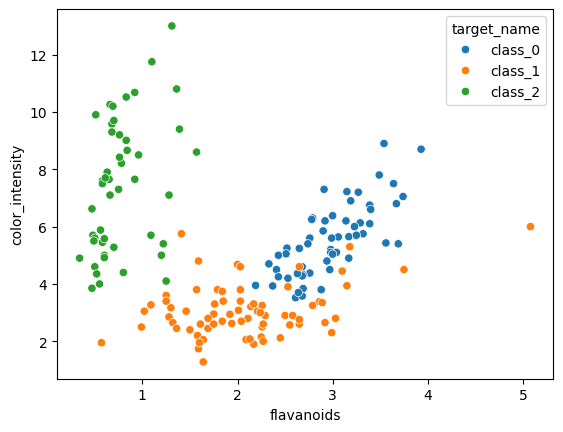

In [11]:
sns.scatterplot(df, x="flavanoids", y="color_intensity", hue="target_name")    

<Axes: xlabel='flavanoids', ylabel='proline'>

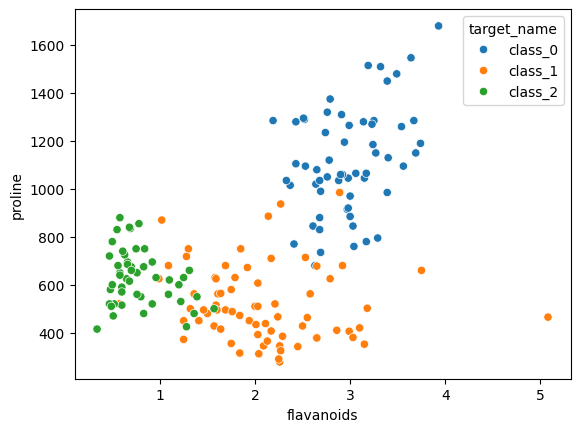

In [12]:
sns.scatterplot(df, x="flavanoids", y="proline", hue="target_name")    

<Axes: xlabel='alcohol', ylabel='color_intensity'>

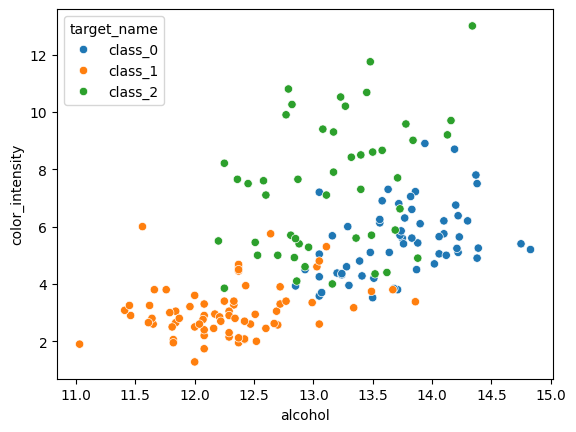

In [13]:
sns.scatterplot(df, x="alcohol", y="color_intensity", hue="target_name")    

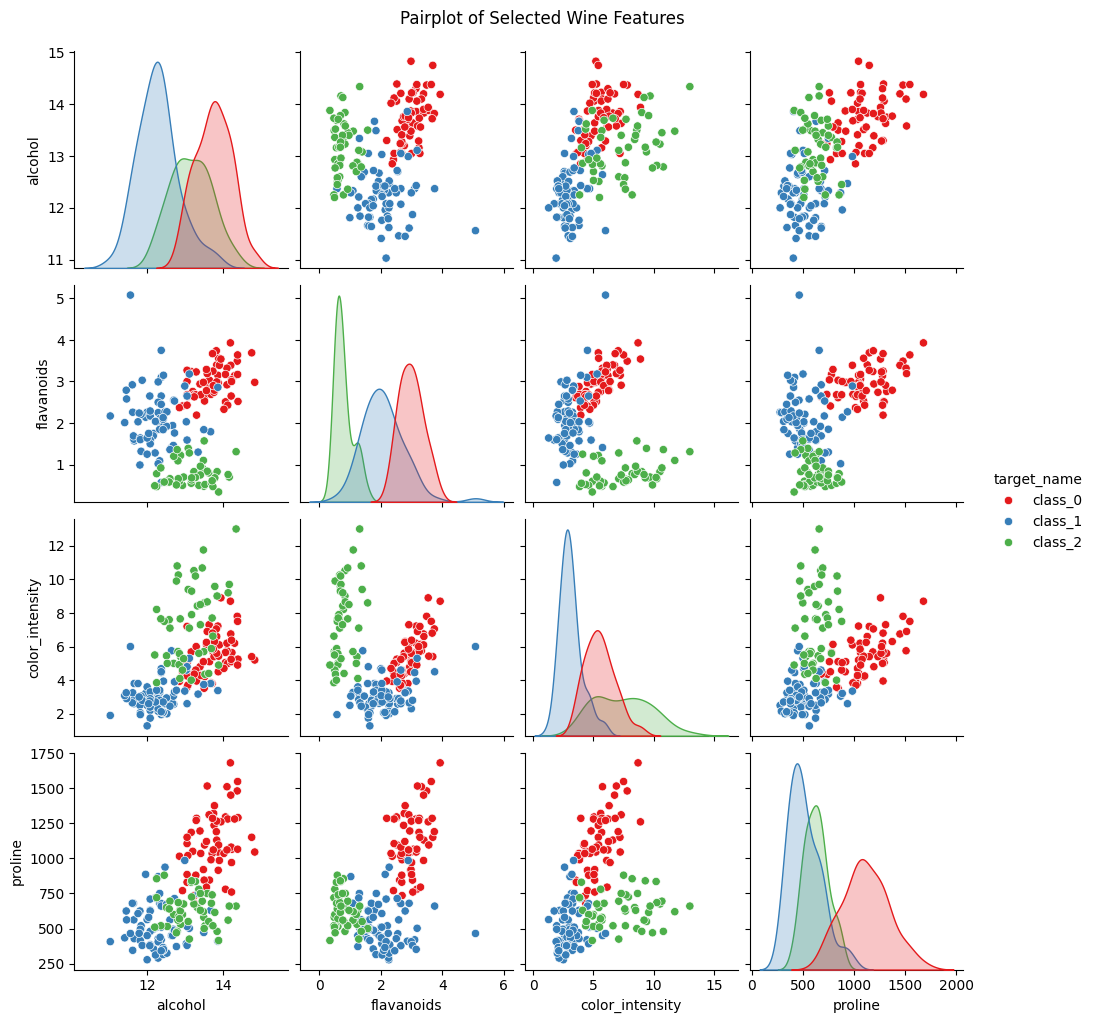

In [14]:
# Select a few meaningful features for pairplot
selected_features = ['alcohol', 'flavanoids', 'color_intensity', 'proline']

# Create the pairplot
sns.pairplot(df[selected_features + ['target_name']], hue='target_name', palette='Set1')
plt.suptitle('Pairplot of Selected Wine Features', y=1.02)
plt.show()

In [15]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [16]:
X = df[['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']]
y = df['target']
X.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                          3.92   1065.0  
1                          3.40   1050.0  
2                          3.17   1185.0  
3                          3.45   1480.0  
4                          2.93    735.0

### Model Training

In [17]:
#Split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

### Model Evaluation: Accuracy Score

In [18]:
model.score(X_test, y_test)

0.9444444444444444

In [19]:
y_pred = model.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9444444444444444

In [21]:
y_pred[:10]

array([0, 1, 0, 0, 2, 2, 0, 0, 1, 1])

In [22]:
y_test[:10].tolist()

[0, 1, 0, 0, 2, 2, 0, 0, 1, 0]

### Model Evaluation: Precision, Recall, F1 Score

In [23]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        23
           1       0.89      0.94      0.92        18
           2       0.92      0.92      0.92        13

    accuracy                           0.94        54
   macro avg       0.94      0.94      0.94        54
weighted avg       0.95      0.94      0.94        54



### Model Evaluation: Confusion Matrix

In [24]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[22,  1,  0],
       [ 0, 17,  1],
       [ 0,  1, 12]])

Text(0.5, 1.0, 'Confusion Matrix')

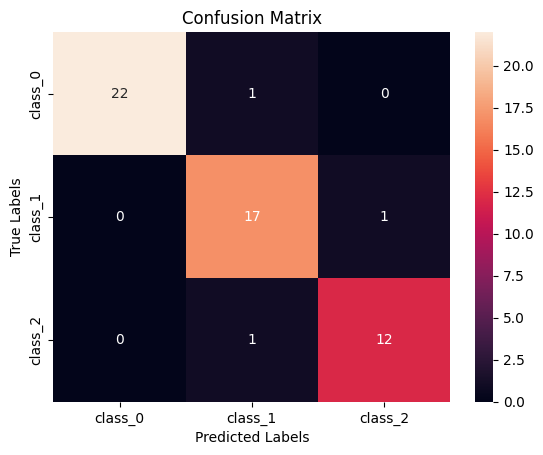

In [25]:
sns.heatmap(cm, xticklabels=wine.target_names, yticklabels=wine.target_names, annot=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')